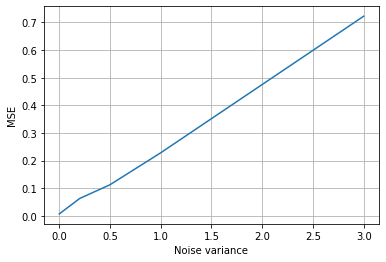

None


In [26]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_pilottransmission(n,sigmasquare):
    h = np.random.randn(2)
    x = np.random.choice([-1,1],n,p=[0.5,0.5])
    y = np.zeros(n)
    for i in range(n):
        y[i] = h[0]*x[i] + h[1]*x[(i-1)%n] + np.sqrt(sigmasquare) * np.random.randn()
    return(h,y,x)


def estimator(x,y,sigmasquare):
    h = np.zeros(2)
    Z =[]
    L = len(x)
    for i in range(L):
      if(i==0):
        Z.append(x[L-1])
      else:
        Z.append(x[i-1])
    A =0
    for i in range(L):
      A = A + (x[i])**2
    B =0
    for i in range(L):
      B = B + x[i]*Z[i]
    C =0
    for i in range(L):
      C = C+ x[i]*y[i]
    D =0
    for i in range(L):
      D = D + Z[i]*y[i]
    
    h = np.dot([C,D],np.linalg.pinv([[A,B],[B,A]]))
    return(h)

def simulate_pilotestimation(n,no_trials):

    mse = np.zeros(5)
    sigmasquare = [0,0.2,0.5,1,3]
    for s in range(5):
        for i in range(no_trials):
            h,y,x = simulate_pilottransmission(n,sigmasquare[s])
            hhat = estimator(x,y,sigmasquare[s])
            mse[s] += np.sum(h-hhat)**2 / no_trials
        
    plt.plot(sigmasquare,mse)
    plt.xlabel('Noise variance')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()


#################################################

n = 10
no_trials = 1000
print(simulate_pilotestimation(n,no_trials))